In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from matplotlib import pyplot
from numpy import genfromtxt
%matplotlib notebook

In [2]:
#ds=pd.read_csv('gooseberry_datasets.csv')
dataset=pd.read_csv('gooseberry_datasets.csv')#ds.sample(frac=1)

my_data = np.array(genfromtxt('gooseberry_datasets.csv', delimiter=','))
#print(my_data)
working_array=np.delete(my_data,0,0)
print(working_array)

X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

[[ 0.75941832 -0.1740668  -0.2491591   0.        ]
 [ 0.84317641 -0.18700793 -0.25825578  0.        ]
 [ 0.71213036 -0.15419217 -0.19305617  0.        ]
 [ 0.7232845  -0.17118885 -0.20304442  0.        ]
 [ 0.75093716 -0.21782727 -0.19810832  0.        ]
 [ 0.58778223 -0.13623068 -0.2146661   0.        ]
 [ 0.69482284 -0.17263877 -0.19997961  0.        ]
 [ 0.73553724 -0.16977933 -0.20251659  0.        ]
 [ 0.75159681 -0.22031163 -0.20011606  0.        ]
 [ 0.56464191 -0.13494628 -0.04770197  0.        ]
 [ 0.74831321 -0.19634784 -0.18542162  0.        ]
 [ 0.76685157 -0.23770684 -0.24819151  0.        ]
 [ 0.56276611 -0.13679035 -0.04845612  0.        ]
 [ 0.54101159 -0.182334   -0.10219237  0.        ]
 [ 0.56281138 -0.13551156 -0.04777288  0.        ]
 [ 0.53795721 -0.18235226 -0.10390054  0.        ]
 [ 0.56806342 -0.13567498 -0.04991455  0.        ]
 [ 0.48412999 -0.16187661 -0.06125247  0.        ]
 [ 0.54197209 -0.18128414 -0.09262138  0.        ]
 [ 0.80769114 -0.15694637 -0.19

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.40,random_state=0)

In [4]:
print(X_train)
print(len(X_train))

[[ 0.95350134 -0.10620845 -0.08924353]
 [ 0.90717967 -0.10579216 -0.09448773]
 [ 0.9881728  -0.08667252 -0.06553526]
 [ 0.56754485 -0.1358069  -0.04962658]
 [ 0.56281138 -0.13551156 -0.04777288]
 [ 0.6613315  -0.2170853  -0.07031021]
 [ 0.90702696 -0.10011343 -0.08454818]
 [ 0.99484857 -0.0905115  -0.07608498]
 [ 0.95466221 -0.18525256 -0.1489375 ]
 [ 0.54985683 -0.18351995 -0.10696588]
 [ 0.92477272 -0.11329995 -0.09126915]
 [ 0.93746123 -0.08087674 -0.02419322]
 [ 0.89891036 -0.10461091 -0.0937839 ]
 [ 0.97257282 -0.1012437  -0.07234759]
 [ 0.77152488 -0.14083726 -0.19255806]
 [ 0.9757934  -0.11971763 -0.09249269]
 [ 0.71213036 -0.15419217 -0.19305617]
 [ 0.76447943 -0.1749639  -0.24694971]
 [ 0.98645266 -0.07699744 -0.06301201]
 [ 0.36132397 -0.08726807 -0.08272417]
 [ 0.95572094 -0.13380808 -0.18042048]
 [ 0.74831321 -0.19634784 -0.18542162]
 [ 0.97520359 -0.09605517 -0.08145891]
 [ 0.76236404 -0.24673992 -0.14815776]
 [ 0.98566184 -0.07632736 -0.05813581]
 [ 0.8334777  -0.10052884

<IPython.core.display.Javascript object>


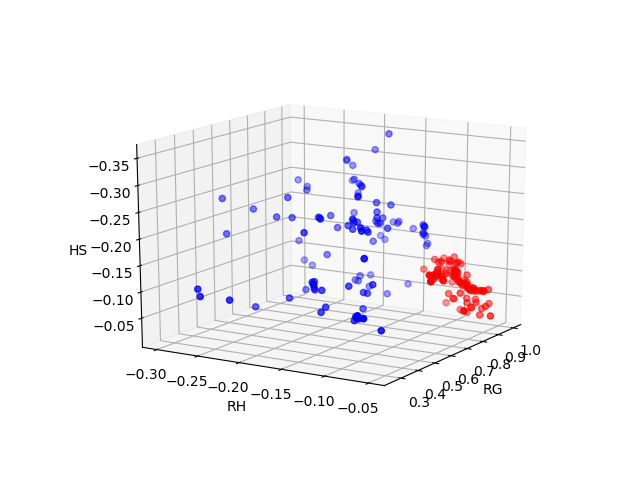

In [5]:
fig = pyplot.figure()
#ax = Axes3D(fig)
ax=plt.axes(projection ="3d")

temp_x1=[]
temp_y1=[]
temp_z1=[]
temp_x2=[]
temp_y2=[]
temp_z2=[]


for i in range(0,len(working_array)):
  if(working_array[i][3]==1):
    temp_x1.append(working_array[i][0])
    temp_y1.append(working_array[i][1])
    temp_z1.append(working_array[i][2])

  else:
    temp_x2.append(working_array[i][0])
    temp_y2.append(working_array[i][1])
    temp_z2.append(working_array[i][2])

# bad_ds=pd. read_csv('/bin/gooseberry_datasets.csv', usecols=['X1','Y1','Z1'])
# good_ds=pd. read_csv('/bin/gooseberry_datasets.csv', usecols=['X2','Y2','Z2'])

x1=np.array(temp_x1)
y1=np.array(temp_y1)
z1=np.array(temp_z1)
x2=np.array(temp_x2)
y2=np.array(temp_y2)
z2=np.array(temp_z2)

# XY=np.column_stack((x1,y1))
# X2Y2=np.column_stack((x2,y2))

# print(XY)
# print(XY.shape)
ax.scatter3D(x1,y1,z1,color="red")
ax.scatter3D(x2,y2,z2,color="blue")
ax.view_init(2, -20)
ax.set_xlabel('RG')
ax.set_ylabel('RH')
ax.set_zlabel('HS')
plt.savefig('prep2',dpi=600)
#plt.show()


In [6]:
#feature_scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [7]:
#training svm

from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,Y_train)

SVC(kernel='linear', random_state=0)

In [8]:
classifier.coef_

array([[1.21614925, 2.57935851, 1.11339037]])

In [9]:
print(classifier.predict(sc.transform([[0.93756289,-0.084700081,-0.058623818]])))

[1]


In [10]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

[[45  0]
 [ 0 43]]


1.0

In [12]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(classifier,X_train,Y_train,cv=5)
print(accuracy)
print(accuracy.mean())
print(accuracy.std())


[1.         1.         1.         0.92307692 1.        ]
0.9846153846153847
0.03076923076923075


<IPython.core.display.Javascript object>


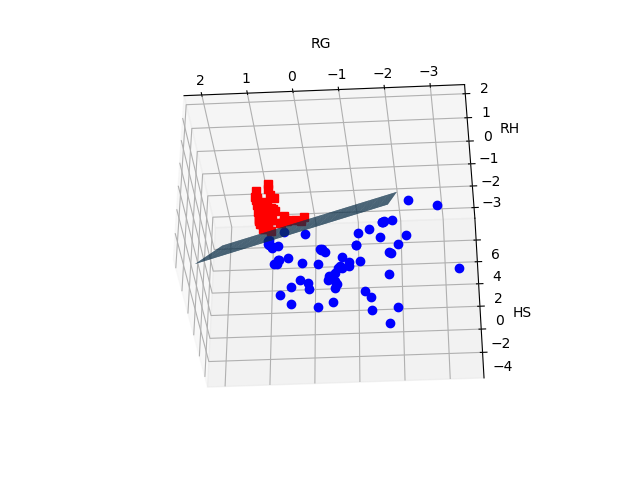

In [13]:
# X = X[np.logical_or(Y==0,Y==1)]
# Y = Y[np.logical_or(Y==0,Y==1)]

# model = svm.SVC(kernel='linear')
# clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-classifier.intercept_[0]-classifier.coef_[0][0]*x -classifier.coef_[0][1]*y) / classifier.coef_[0][2]
# 
tmp = np.linspace(-2,2,20)
x,y = np.meshgrid(tmp,tmp)
# x,y = np.meshgrid(2,2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X_train[Y_train==0,0], X_train[Y_train==0,1],X_train[Y_train==0,2],'ob')  #X_train[Y_train==0,2]
ax.plot3D(X_train[Y_train==1,0], X_train[Y_train==1,1],X_train[Y_train==1,2],'sr') #X_train[Y_train==1,2]
ax.plot_surface(x, y, z(x,y))
ax.view_init(-3, -13)
ax.set_xlabel('RG')
ax.set_ylabel('RH')
ax.set_zlabel('HS')
plt.savefig('trainfig3',dpi=600)
# plt.show()

<IPython.core.display.Javascript object>


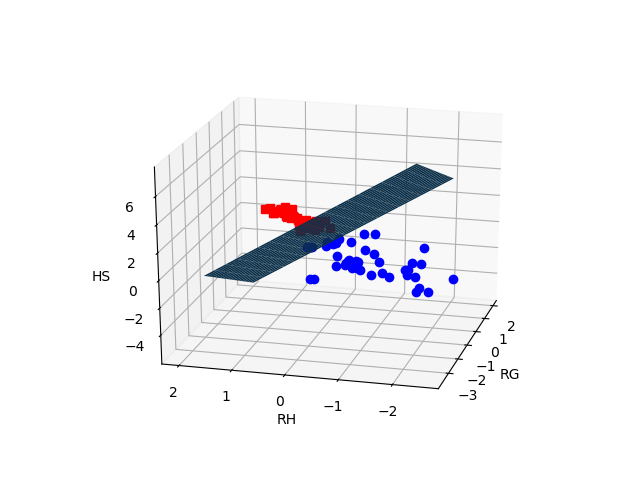

In [14]:
# X = X[np.logical_or(Y==0,Y==1)]
# Y = Y[np.logical_or(Y==0,Y==1)]

# model = svm.SVC(kernel='linear')
# clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-classifier.intercept_[0]-classifier.coef_[0][0]*x -classifier.coef_[0][1]*y) / classifier.coef_[0][2]
# 
tmp = np.linspace(-2,2,20)
x,y = np.meshgrid(tmp,tmp)
# x,y = np.meshgrid(2,2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X_test[Y_test==0,0], X_test[Y_test==0,1],X_test[Y_test==0,2],'ob') #,X_test[Y_test==0,2]
ax.plot3D(X_test[Y_test==1,0], X_test[Y_test==1,1],X_test[Y_test==1,2],'sr') #,X_test[Y_test==1,2]
ax.plot_surface(x, y, z(x,y))
ax.view_init(45, 215)
ax.set_xlabel('RG')
ax.set_ylabel('RH')
ax.set_zlabel('HS')

plt.show()